In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

### Functions

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

def plot_with_variation(file_path, n, save_path, rename_rules, plot_order, xlim, xlabel, ylabel):
    """
    绘制带有移动平均和变异范围的图像。

    参数：
        file_path (str): CSV 文件路径。
        n (int): 移动平均窗口大小。
        save_path (str): 保存图像的路径。
        rename_rules (dict): 方法名称重命名规则。
        plot_order (list): 绘图的顺序，确保颜色一致。
        xlim (tuple): x 轴显示的范围，如 (0, 500000)。
        xlabel (str): x 轴标签。
        ylabel (str): y 轴标签。
    """
    # 加载数据
    data = pd.read_csv(file_path)
    
    sns.set_theme()
    sns.set_style("darkgrid")

    # 提取列名，按顺序每3列为一组
    columns = [col for col in data.columns if col != "Step"]
    methods = [columns[i:i+3] for i in range(0, len(columns), 3)]  # 每3列为一组

    # 确保 Seaborn 使用指定顺序的颜色
    palette = sns.color_palette("tab10", len(plot_order))
    color_mapping = {name: palette[i] for i, name in enumerate(plot_order)}

    plt.figure(figsize=(10, 6))

    # 用于 legend 中去重和按顺序绘图
    used_labels = set()

    for plot_name in plot_order:
        for method_group in methods:
            if len(method_group) == 3:
                method_avg, method_min, method_max = method_group
                
                # 检查方法是否包含关键词并重命名
                for keyword, new_name in rename_rules.items():
                    if keyword in method_avg:
                        label_name = new_name
                        break
                else:
                    label_name = method_avg  # 如果不包含任何关键词，则保留原名称

                # 仅绘制当前顺序中的方法
                if label_name != plot_name:
                    continue

                # 提取非空的数据点
                valid_idx = data[method_avg].notna() & data[method_min].notna() & data[method_max].notna()
                steps = data["Step"][valid_idx]
                
                avg_data = data[method_avg][valid_idx]
                min_data = data[method_min][valid_idx]
                max_data = data[method_max][valid_idx]
                
                # 计算移动平均
                avg_moving = avg_data.rolling(window=n, min_periods=1).mean()
                min_moving = min_data.rolling(window=n, min_periods=1).mean()
                max_moving = max_data.rolling(window=n, min_periods=1).mean()
                
                # 确保 legend 中不重复添加相同的标签
                if label_name not in used_labels:
                    sns.lineplot(x=steps, y=avg_moving, label=label_name, color=color_mapping[label_name])
                    used_labels.add(label_name)
                else:
                    sns.lineplot(x=steps, y=avg_moving, color=color_mapping[label_name])
                
                # 绘制变异范围阴影
                plt.fill_between(
                    steps,
                    min_moving,
                    max_moving,
                    alpha=0.2,
                    color=color_mapping[label_name]
                )

    plt.xlim(xlim)  # 使用指定范围
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.legend(fontsize=10)
    plt.tight_layout()

    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()

# Main

## Main TrapMaze

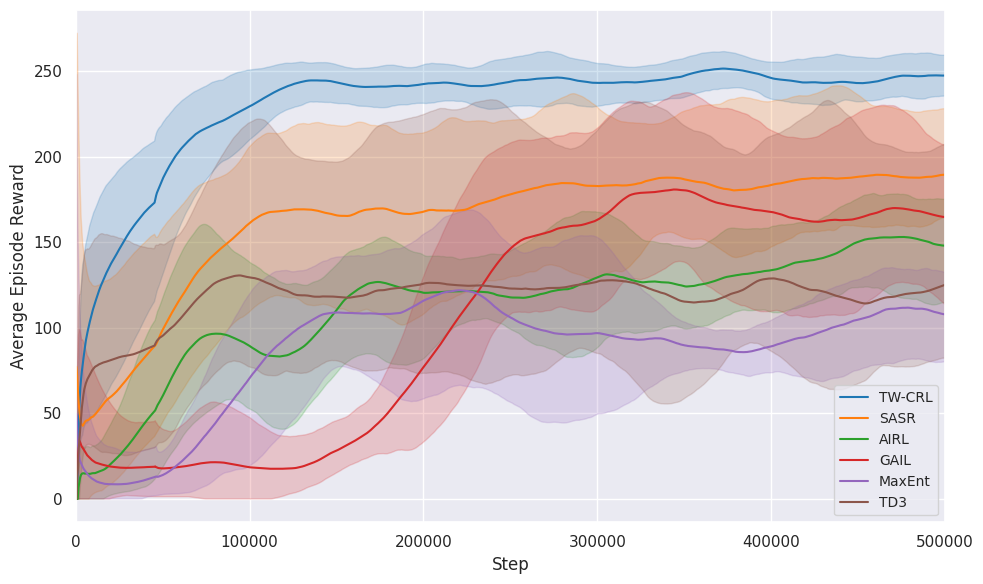

In [13]:
rename_rules = {
    'My': 'TW-CRL',
    'SASR': 'SASR',
    'TD3': 'TD3',
    'GAIL': 'GAIL',
    'AIRL': 'AIRL',
    'Max': 'MaxEnt'
}

plot_order = ['TW-CRL', 'SASR', 'AIRL', 'GAIL', 'MaxEnt', 'TD3']

file_path = '/home/xlx9645/failed/wandbtest/plot_asset/main_trapmaze.csv'
n = 100
save_dir = 'figs'
os.makedirs(save_dir, exist_ok=True)
save_path = os.path.join(save_dir, 'main_trapmaze_with_variation.png')

plot_with_variation(
    file_path=file_path,
    n=n,
    save_path=save_path,
    rename_rules=rename_rules,
    plot_order=plot_order,
    xlim=(0, 500000),
    xlabel="Step",
    ylabel="Average Episode Reward"
)

## Main Maze

## Main Pandareach

## Main Pandapush

# Ablation

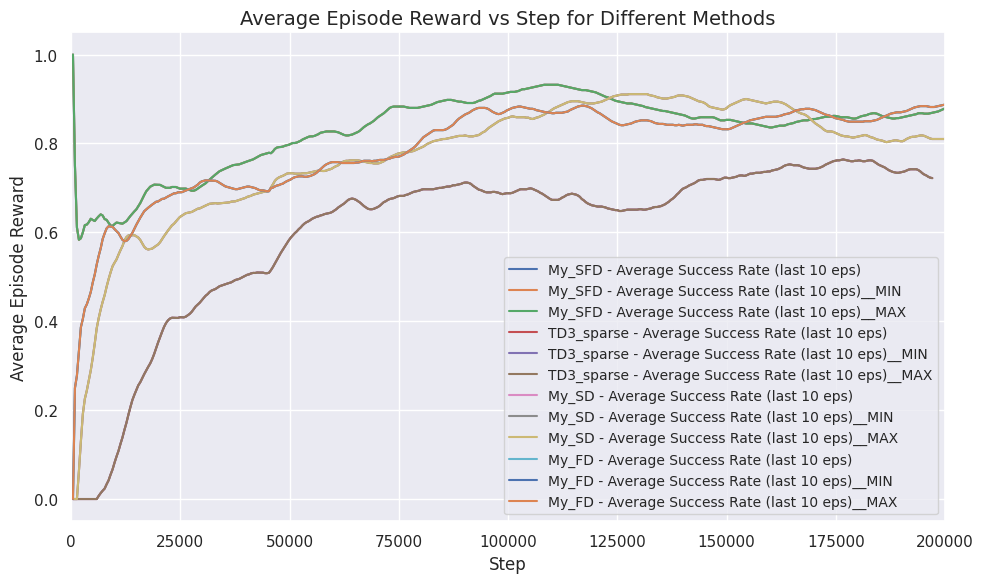

图像已保存到: figs/success_rate_plot_seaborn.png


In [9]:
# 加载 CSV 文件
file_path = '/home/xlx9645/failed/wandbtest/wandb_export_2024-12-27T19_59_46.857-06_00.csv'
data = pd.read_csv(file_path)
n = 100

# 设置要保存图像的文件夹
save_dir = 'figs'
os.makedirs(save_dir, exist_ok=True)  # 如果文件夹不存在，创建它
# sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set_style("darkgrid")


# 图像保存路径
save_path = os.path.join(save_dir, 'success_rate_plot_seaborn.png')
methods = [col for col in data.columns if col != "Step"]
# 初始化图像
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# 绘制曲线
for method in methods:
    if method in data.columns:
        valid_data = data[method][~pd.isna(data[method])]
        moving_avg = []  # 用于存储每个点的前 n 个点（包括当前点）的平均值
        for i in range(len(valid_data)):
            # 取前 n 个点（包括当前点），不足 n 个点则取所有点
            window = valid_data[max(0, i - (n - 1)):i + 1]
            moving_avg.append(window.mean())
        # 使用 Seaborn 绘图
        sns.set_style("darkgrid")
        sns.lineplot(
            x=data["Step"][~pd.isna(data[method])],
            y=moving_avg,
            label=method
        )


# 限制横坐标范围
plt.xlim(0, 200000)

plt.xlabel("Step", fontsize=12)
plt.ylabel("Average Episode Reward", fontsize=12)
plt.title("Average Episode Reward vs Step for Different Methods", fontsize=14)
plt.legend(fontsize=10)
plt.tight_layout()

# 保存图像并显示
plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.show()

print(f"图像已保存到: {save_path}")

# Draft

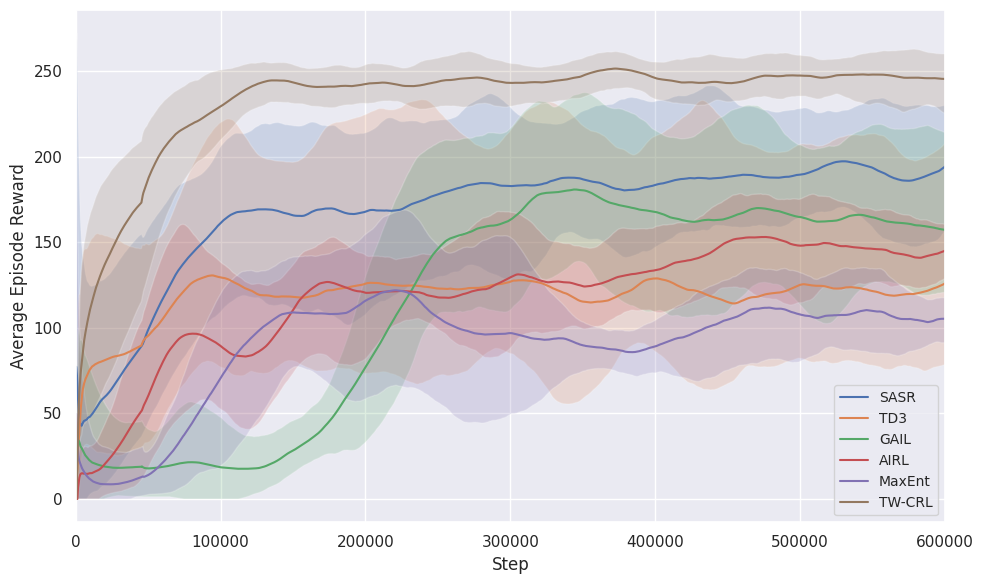

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# 加载 CSV 文件
file_path = '/home/xlx9645/failed/wandbtest/plot_asset/main_trapmaze.csv'
data = pd.read_csv(file_path)
n = 100  # 移动平均窗口大小

sns.set_theme()
sns.set_style("darkgrid")
save_dir = 'figs'
os.makedirs(save_dir, exist_ok=True)  # 如果文件夹不存在，创建它
save_path = os.path.join(save_dir, 'main_trapmaze_with_variation.png')

# 提取列名，按顺序每3列为一组
columns = [col for col in data.columns if col != "Step"]
methods = [columns[i:i+3] for i in range(0, len(columns), 3)]  # 每3列为一组

# 定义方法重命名规则
rename_rules = {
    'My': 'TW-CRL',
    'SASR': 'SASR',
    'TD3': 'TD3',
    'GAIL': 'GAIL',
    'AIRL': 'AIRL',
    'Max': 'MaxEnt'
}

plt.figure(figsize=(10, 6))

# 存储用于 legend 的重命名值，避免重复
used_labels = set()

for method_group in methods:
    if len(method_group) == 3:
        method_avg, method_min, method_max = method_group
        
        # 检查方法是否包含某个子字符串并重命名
        for keyword, new_name in rename_rules.items():
            if keyword in method_avg:  # 检查是否包含关键词
                label_name = new_name
                break
        else:
            label_name = method_avg  # 如果不包含任何关键词，则保留原名称

        # 提取非空的数据点
        valid_idx = data[method_avg].notna() & data[method_min].notna() & data[method_max].notna()
        steps = data["Step"][valid_idx]
        
        avg_data = data[method_avg][valid_idx]
        min_data = data[method_min][valid_idx]
        max_data = data[method_max][valid_idx]
        
        # 计算移动平均
        avg_moving = avg_data.rolling(window=n, min_periods=1).mean()
        min_moving = min_data.rolling(window=n, min_periods=1).mean()
        max_moving = max_data.rolling(window=n, min_periods=1).mean()
        
        # 确保 legend 中不重复添加相同的标签
        if label_name not in used_labels:
            sns.lineplot(x=steps, y=avg_moving, label=label_name)
            used_labels.add(label_name)
        else:
            sns.lineplot(x=steps, y=avg_moving)
        
        # 绘制变异范围阴影
        plt.fill_between(
            steps,
            min_moving,
            max_moving,
            alpha=0.2
        )

plt.xlim(0, 600000)  # 使用整数而不是科学计数法
plt.xlabel("Step", fontsize=12)
plt.ylabel("Average Episode Reward", fontsize=12)
plt.legend(fontsize=10)
plt.tight_layout()

plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.show()

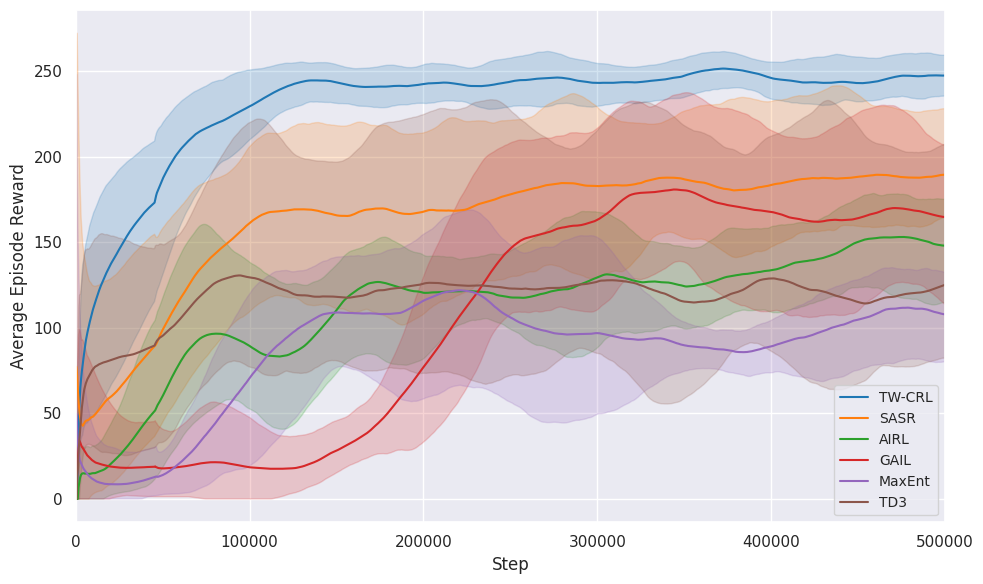

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# 加载 CSV 文件
file_path = '/home/xlx9645/failed/wandbtest/plot_asset/main_trapmaze.csv'
data = pd.read_csv(file_path)
n = 100  # 移动平均窗口大小

sns.set_theme()
sns.set_style("darkgrid")
save_dir = 'figs'
os.makedirs(save_dir, exist_ok=True)  # 如果文件夹不存在，创建它
save_path = os.path.join(save_dir, 'main_trapmaze_with_variation.png')

# 提取列名，按顺序每3列为一组
columns = [col for col in data.columns if col != "Step"]
methods = [columns[i:i+3] for i in range(0, len(columns), 3)]  # 每3列为一组

# 定义方法重命名规则
rename_rules = {
    'My': 'TW-CRL',
    'SASR': 'SASR',
    'TD3': 'TD3',
    'GAIL': 'GAIL',
    'AIRL': 'AIRL',
    'Max': 'MaxEnt'
}

# 定义绘图顺序
plot_order = ['TW-CRL', 'SASR', 'AIRL', 'GAIL', 'MaxEnt', 'TD3']

# 确保 Seaborn 使用指定顺序的颜色
palette = sns.color_palette("tab10", len(plot_order))
color_mapping = {name: palette[i] for i, name in enumerate(plot_order)}

plt.figure(figsize=(10, 6))

# 用于 legend 中去重和按顺序绘图
used_labels = set()

for plot_name in plot_order:
    for method_group in methods:
        if len(method_group) == 3:
            method_avg, method_min, method_max = method_group
            
            # 检查方法是否包含关键词并重命名
            for keyword, new_name in rename_rules.items():
                if keyword in method_avg:
                    label_name = new_name
                    break
            else:
                label_name = method_avg  # 如果不包含任何关键词，则保留原名称

            # 仅绘制当前顺序中的方法
            if label_name != plot_name:
                continue

            # 提取非空的数据点
            valid_idx = data[method_avg].notna() & data[method_min].notna() & data[method_max].notna()
            steps = data["Step"][valid_idx]
            
            avg_data = data[method_avg][valid_idx]
            min_data = data[method_min][valid_idx]
            max_data = data[method_max][valid_idx]
            
            # 计算移动平均
            avg_moving = avg_data.rolling(window=n, min_periods=1).mean()
            min_moving = min_data.rolling(window=n, min_periods=1).mean()
            max_moving = max_data.rolling(window=n, min_periods=1).mean()
            
            # 确保 legend 中不重复添加相同的标签
            if label_name not in used_labels:
                sns.lineplot(x=steps, y=avg_moving, label=label_name, color=color_mapping[label_name])
                used_labels.add(label_name)
            else:
                sns.lineplot(x=steps, y=avg_moving, color=color_mapping[label_name])
            
            # 绘制变异范围阴影
            plt.fill_between(
                steps,
                min_moving,
                max_moving,
                alpha=0.2,
                color=color_mapping[label_name]
            )

plt.xlim(0, 500000)  # 使用整数而不是科学计数法
plt.xlabel("Step", fontsize=12)
plt.ylabel("Average Episode Reward", fontsize=12)
plt.legend(fontsize=10)
plt.tight_layout()

plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.show()